In [1]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns



# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 



In [2]:
df_health = pd.read_csv("/Users/swatiraman/Downloads/drive-download-20210428T114902Z-001/df.csv")
df_health.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,6.586219,-6.527018,9.182882,-9.018023,-6.181923,5.151193,-9.708139,2.814690,-2.712184,-6.811191
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-9.588554,1.863741,-9.378731,8.289190,-2.561066,-3.755943,1.406037,7.590942,0.480820,-4.636475
2,73559,8,2,1,72,NaN,3,3,2,NaN,...,-5.229054,6.379788,-9.433054,-9.285869,9.248429,-7.439368,8.374918,8.401561,-9.936335,0.913262
3,73560,8,2,1,9,NaN,3,3,1,119.0,...,7.428271,-1.193575,6.972074,-0.257756,-5.087773,8.581422,4.767615,9.760521,-4.708915,7.624684
4,73561,8,2,2,73,NaN,3,3,1,NaN,...,2.125105,-2.906226,1.977286,-1.322955,-1.034636,6.702919,-1.735375,-4.799543,1.194572,-7.098007


In [3]:
for i in df_health.columns:
    if (df_health[i].isnull().sum() > 100):
        df_health.drop(i,axis=1,inplace=True)

In [4]:
for i in df_health.columns:
    if (df_health[i].isnull().sum() > 0 ):
        #df[i].fillna(df[i].median,inplace=True)
        print(i,'contain almost all null values',df_health[i].isnull().sum())

DMDCITZN contain almost all null values 4
SIAPROXY contain almost all null values 1


In [5]:
df_health.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDCITZN', 'SIALANG', 'SIAPROXY',
       'SIAINTRP', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE',
       'DMDHRGND', 'DMDHRAGE', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA',
       'WTDRD1', 'DR1DRSTZ', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060',
       'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180',
       'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TM221', 'DR1TP182', 'DR1TP183',
       'DR1TP184', 'DR1TP204', 'DR1TP205', 'DR1TP225', 'DR1TP226', 'DR1.300',
       'DR1.320Z', 'DR1.330Z', 'DR1BWATZ', 'DR1TFA', 'DR1TFF', 'DR1TFDFE',
       'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK',
       'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP',
       'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DRD340',
       'DRD360', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT', 'LBXS

In [6]:
corr_matrix = df_health[[ 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDCITZN', 'SIALANG', 'SIAPROXY',
       'SIAINTRP', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE',
       'DMDHRGND', 'DMDHRAGE', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA',
       'WTDRD1', 'DR1DRSTZ', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060',
       'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180',
       'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TM221', 'DR1TP182', 'DR1TP183',
       'DR1TP184', 'DR1TP204', 'DR1TP205', 'DR1TP225', 'DR1TP226', 'DR1.300',
       'DR1.320Z', 'DR1.330Z', 'DR1BWATZ', 'DR1TFA', 'DR1TFF', 'DR1TFDFE',
       'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK',
       'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP',
       'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DRD340',
       'DRD360', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT', 'LBXSAL',
       'LBDSALSI', 'LBXSAPSI']].corr()

In [7]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [8]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [9]:
to_drop

['RIDRETH3', 'SIAPROXY', 'DMDFMSIZ', 'WTMEC2YR', 'WTDRD1']

In [10]:
to_drop_1 = [column for column in upper.columns if any(upper[column] < -0.75)]
print(to_drop_1)

['DRD360']


In [11]:
df_health.drop(to_drop,axis=1,inplace=True)

In [12]:
df_health.drop(to_drop_1,axis=1,inplace=True)

In [13]:
df_health.std()==True

SEQN        False
SDDSRVYR    False
RIDSTATR    False
RIAGENDR    False
RIDAGEYR    False
            ...  
URXCRS      False
URDACT      False
LBXSAL      False
LBDSALSI    False
LBXSAPSI    False
Length: 75, dtype: bool

In [14]:
for i in df_health.columns:
    if len(df_health[i].unique()) == 1:
        print(i)
        df_health.drop(i,axis=1,inplace=True)

SDDSRVYR
RIDSTATR


In [15]:
df_health.shape

(9813, 73)

In [16]:
for i in df_health.columns:
    print(i,len(df_health[i].unique()))

SEQN 9813
RIAGENDR 2
RIDAGEYR 81
RIDRETH1 5
RIDEXMON 2
DMDBORN4 3
DMDCITZN 5
SIALANG 2
SIAINTRP 2
DMDHHSIZ 7
DMDHHSZA 4
DMDHHSZB 5
DMDHHSZE 4
DMDHRGND 2
DMDHRAGE 63
WTINT2YR 6861
SDMVPSU 2
SDMVSTRA 15
DR1DRSTZ 4
DR1TALCO 9813
DR1TMOIS 9813
DR1TS040 9813
DR1TS060 9813
DR1TS080 9813
DR1TS100 9813
DR1TS120 9813
DR1TS140 9813
DR1TS160 9813
DR1TS180 9813
DR1TM161 9813
DR1TM181 9813
DR1TM201 9813
DR1TM221 9813
DR1TP182 9813
DR1TP183 9813
DR1TP184 9813
DR1TP204 9813
DR1TP205 9813
DR1TP225 9813
DR1TP226 9813
DR1.300 9813
DR1.320Z 9813
DR1.330Z 9812
DR1BWATZ 9812
DR1TFA 9813
DR1TFF 9813
DR1TFDFE 9813
DR1TCHL 9813
DR1TVB12 9813
DR1TB12A 9813
DR1TVC 9813
DR1TVD 9813
DR1TVK 9813
DR1TCALC 9813
DR1TPHOS 9813
DR1TMAGN 9812
DR1TIRON 9813
DR1TZINC 9813
DR1TCOPP 9813
DR1TSODI 9813
DR1TPOTA 9813
DR1TSELE 9813
DR1TCAFF 9813
DR1TTHEO 9812
DRD340 9813
URXUMA 9812
URXUMS 9812
URXUCR.x 9812
URXCRS 9813
URDACT 9813
LBXSAL 9813
LBDSALSI 9813
LBXSAPSI 9813


In [17]:
df_health.shape

(9813, 73)

In [18]:
df_health.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDEXMON,DMDBORN4,DMDCITZN,SIALANG,SIAINTRP,DMDHHSIZ,...,DR1TTHEO,DRD340,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9809.000000,9813.000000,9813.000000,9813.000000,...,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.507694,31.629573,3.083766,1.508509,1.219709,1.098787,1.106491,1.965964,3.880465,...,-0.759246,-1.734956,-0.711343,0.820030,0.511885,2.087264,1.037003,2.810665,-0.255001,-0.679591
std,2938.592266,0.499966,24.397553,1.262812,0.499953,1.579601,0.344094,0.308481,0.181332,1.724762,...,5.269205,6.665694,5.514023,4.847528,5.927111,5.582975,6.174046,5.767382,4.868527,5.174773
min,73557.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-10.014475,-9.998027,-9.759888,-10.001466,-9.665313,-9.835496,-9.739738,-8.885937,-9.968040,-9.516987
25%,76092.000000,1.000000,10.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,-3.707880,-8.764742,-4.772251,-2.817109,-5.081807,-2.314521,-4.252078,-2.047854,-4.709602,-4.487764
50%,78643.000000,2.000000,27.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,...,-1.614540,-4.423152,-1.379131,-0.259016,-1.039955,3.390824,4.159020,4.867756,-0.504415,-2.959643
75%,81191.000000,2.000000,52.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000,5.000000,...,2.172646,7.025565,3.293431,5.817885,5.847951,6.708240,6.299989,8.099925,3.973927,3.068091
max,83731.000000,2.000000,80.000000,5.000000,2.000000,77.000000,9.000000,2.000000,2.000000,7.000000,...,9.826129,9.831464,9.212580,9.852084,9.542277,9.379928,9.740811,9.819095,9.474146,8.250141


In [19]:
for i in df_health.columns:
    if len(df_health[i].unique())<10:
        print(i,'=',df_health[i].unique())

RIAGENDR = [1 2]
RIDRETH1 = [4 3 1 5 2]
RIDEXMON = [1 2]
DMDBORN4 = [ 1  2 77]
DMDCITZN = [ 1.  2. nan  7.  9.]
SIALANG = [1 2]
SIAINTRP = [2 1]
DMDHHSIZ = [3 4 2 1 7 5 6]
DMDHHSZA = [0 1 3 2]
DMDHHSZB = [0 2 3 1 4]
DMDHHSZE = [2 0 1 3]
DMDHRGND = [1 2]
SDMVPSU = [1 2]
DR1DRSTZ = [1 4 5 2]


In [20]:
df_health.columns

Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDEXMON', 'DMDBORN4',
       'DMDCITZN', 'SIALANG', 'SIAINTRP', 'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB',
       'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE', 'WTINT2YR', 'SDMVPSU', 'SDMVSTRA',
       'DR1DRSTZ', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060', 'DR1TS080',
       'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180', 'DR1TM161',
       'DR1TM181', 'DR1TM201', 'DR1TM221', 'DR1TP182', 'DR1TP183', 'DR1TP184',
       'DR1TP204', 'DR1TP205', 'DR1TP225', 'DR1TP226', 'DR1.300', 'DR1.320Z',
       'DR1.330Z', 'DR1BWATZ', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL',
       'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC',
       'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI',
       'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DRD340', 'URXUMA',
       'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT', 'LBXSAL', 'LBDSALSI',
       'LBXSAPSI'],
      dtype='object')

In [21]:
df_health.shape

(9813, 73)

In [22]:
df = df_health.drop('SEQN',axis=1)

In [23]:
print(df.isnull().sum()>0)

RIAGENDR    False
RIDAGEYR    False
RIDRETH1    False
RIDEXMON    False
DMDBORN4    False
            ...  
URXCRS      False
URDACT      False
LBXSAL      False
LBDSALSI    False
LBXSAPSI    False
Length: 72, dtype: bool


In [24]:
for i in df.columns:
    if (df[i].isnull().sum() > 0 ):
        df[i].fillna(df[i].mean(),inplace=True)
        #print(i,'contain almost all null values',df_health[i].isnull().sum())

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


df_scaled = pd.DataFrame(scaled_data, columns = df.columns)

df_scaled.describe()

,RIAGENDR,RIDAGEYR,RIDRETH1,RIDEXMON,DMDBORN4,DMDCITZN,SIALANG,SIAINTRP,DMDHHSIZ,DMDHHSZA,...,DR1TTHEO,DRD340,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
count,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,...,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03
mean,4.063916e-17,3.710926e-18,2.192614e-17,3.990603e-16,-5.110443e-17,-1.310104e-15,6.240012e-16,-7.710636e-16,-3.243129e-16,-6.361975e-16,...,2.957993e-17,6.595944e-18,-6.629886e-18,3.197279e-17,-3.254980e-17,1.733274e-17,1.712909e-17,2.525240e-17,1.731011e-17,-1.357656e-17
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-1.015508e+00,-1.296490e+00,-1.650184e+00,-1.017166e+00,-1.390983e-01,-2.871655e-01,-3.452295e-01,-5.327311e+00,-1.670150e+00,-6.630139e-01,...,-1.756565e+00,-1.239705e+00,-1.641090e+00,-2.232488e+00,-1.717146e+00,-2.135666e+00,-1.745580e+00,-2.028164e+00,-1.995169e+00,-1.707871e+00
25%,-1.015508e+00,-8.865920e-01,-8.582604e-01,-1.017166e+00,-1.390983e-01,-2.871655e-01,-3.452295e-01,1.877120e-01,-1.090330e+00,-6.630139e-01,...,-5.596262e-01,-1.054675e+00,-7.365068e-01,-7.503462e-01,-9.437948e-01,-7.884702e-01,-8.567073e-01,-8.424562e-01,-9.150260e-01,-7.359487e-01
50%,9.847288e-01,-1.897653e-01,-6.633663e-02,9.831241e-01,-1.390983e-01,-2.871655e-01,-3.452295e-01,1.877120e-01,6.930892e-02,-6.630139e-01,...,-1.623278e-01,-4.033087e-01,-1.211135e-01,-2.226084e-01,-2.618338e-01,2.335002e-01,5.056937e-01,3.566948e-01,-5.123258e-02,-4.406316e-01
75%,9.847288e-01,8.349799e-01,7.255871e-01,9.831241e-01,-1.390983e-01,-2.871655e-01,-3.452295e-01,1.877120e-01,6.491285e-01,5.638681e-01,...,5.564484e-01,1.314337e+00,7.263260e-01,1.031064e+00,9.003270e-01,8.277328e-01,8.524805e-01,9.171456e-01,8.686700e-01,7.242583e-01
max,9.847288e-01,1.982694e+00,1.517511e+00,9.831241e-01,4.797677e+01,2.296820e+01,2.896624e+00,1.877120e-01,1.808768e+00,3.017632e+00,...,2.009015e+00,1.735305e+00,1.799853e+00,1.863324e+00,1.523652e+00,1.306299e+00,1.409813e+00,1.215246e+00,1.998478e+00,1.725715e+00


In [26]:
from sklearn.decomposition import PCA
pca=PCA()
pcadata=pca.fit_transform(df_scaled)

In [27]:
df_scaled.shape[1]

72

In [28]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = df_scaled.shape[1])
pca_data = pca.fit_transform(df_scaled)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.95:
        break
    itr=itr+1

print('The number of principle components capturing 95 percent variation in data is : ',itr,' Variance explained is ', cum_var)

The number of principle components capturing 95 percent variation in data is :  35  Variance explained is  0.9523218617287318


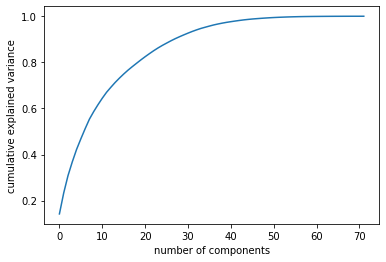

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [30]:
from sklearn.cluster import KMeans
cl=[5,6,10,15,20,21,22,23,24,25,26,27,28,29,30]
for k in cl:
    clust_mod=KMeans(n_clusters=k,max_iter=1000,random_state=0)
    clust_mod.fit(pcadata)
    print(k,silhouette_score(pcadata,clust_mod.labels_))

5 0.19576683402951403
6 0.21440689155867992
10 0.2973419120206258
15 0.3993296155965707
20 0.4500889366642093
21 0.4531728262774646
22 0.46687060268603714
23 0.418041849360996
24 0.423551933163787
25 0.42595329013742583
26 0.4007559186987751
27 0.40557562186206686
28 0.4175370866513067
29 0.4084424724066904
30 0.40826803651374066


In [31]:
clusters = KMeans(n_clusters = 15, random_state = 10)

# fit the model
clusters.fit(pcadata)

# create a copy of the original dataframe
df_cluster = df_health.copy()


# add the cluster labels as the new column in the dataframe
df_cluster['Cluster'] = clusters.labels_

In [32]:
df_cluster[['SEQN','Cluster']].head(20)

,SEQN,Cluster
0,73557,11
1,73558,13
2,73559,13
3,73560,2
4,73561,6
5,73562,3
6,73563,1
7,73564,9
8,73566,6
9,73567,5


In [33]:
df_cluster['Cluster'].value_counts()

13    1515
2     1321
1      982
8      812
5      723
3      644
6      542
14     505
0      451
4      436
11     428
7      392
10     378
9      367
12     317
Name: Cluster, dtype: int64